In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Old Models Performances

In [12]:
old_models_data = pd.read_excel('exps.xlsx', sheet_name="old-models")
old_models_avg_pre = pd.DataFrame(old_models_data.mean(axis=0))
old_models_avg_pre

,0
SB,0.16565
GSB,0.18783
GSBW-7,0.21168


In [13]:
old_best_model = old_models_avg_pre.max().values[0]
old_best_model

0.21168000000000006

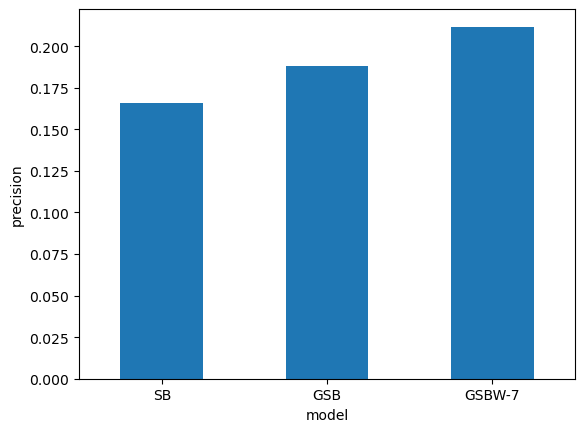

In [4]:
ax = old_models_avg_pre.plot.bar(rot=0)
ax.legend().remove()
ax.set_ylabel("precision")
ax.set_xlabel("model")
plt.show()

## Intoducing Pruned GSB (PGSB) and conceptualized GSB (CGSB)

### Performance based on the size of spectral clustering

In [5]:
data = pd.read_excel('exps.xlsx', sheet_name="complete-graph-clusters")
data

,PGSB-30,CGSB-30,PGSB-50,CGSB-50,PGSB-70,CGSB-70,PGSB-90,CGSB-90,PGSB-110,CGSB-110,PGSB-130,CGSB-130,PGSB-150,CGSB-150,PGSB-170,CGSB-170,avg_pre,%prune
0,0.303,0.294,0.303,0.298,0.344,0.298,0.321,0.298,0.321,0.299,0.321,0.298,0.321,0.298,0.321,0.299,0.20990,29.326771
1,0.190,0.076,0.195,0.061,0.199,0.061,0.190,0.061,0.190,0.069,0.190,0.062,0.190,0.062,0.190,0.069,0.24283,27.473101
2,0.173,0.175,0.173,0.174,0.173,0.175,0.173,0.176,0.148,0.177,0.173,0.176,0.173,0.176,0.173,0.177,0.22871,33.625574
3,0.114,0.128,0.114,0.128,0.114,0.128,0.093,0.128,0.114,0.129,0.114,0.128,0.114,0.128,0.114,0.129,0.24238,22.624413
4,0.300,0.311,0.300,0.309,0.300,0.313,0.300,0.309,0.300,0.314,0.300,0.309,0.300,0.309,0.300,0.314,0.22397,34.078264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.332,0.273,0.332,0.274,0.332,0.273,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,NaN,NaN
96,0.379,0.361,0.379,0.364,0.379,0.367,0.379,0.358,0.379,0.359,0.234,0.358,0.379,0.358,0.379,0.359,NaN,NaN
97,0.145,0.124,0.138,0.124,0.138,0.125,0.156,0.125,0.145,0.127,0.145,0.125,0.156,0.125,0.145,0.127,NaN,NaN
98,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [6]:
clusters_experiment = data.iloc[:, :-2]
clusters_experiment

,PGSB-30,CGSB-30,PGSB-50,CGSB-50,PGSB-70,CGSB-70,PGSB-90,CGSB-90,PGSB-110,CGSB-110,PGSB-130,CGSB-130,PGSB-150,CGSB-150,PGSB-170,CGSB-170
0,0.303,0.294,0.303,0.298,0.344,0.298,0.321,0.298,0.321,0.299,0.321,0.298,0.321,0.298,0.321,0.299
1,0.190,0.076,0.195,0.061,0.199,0.061,0.190,0.061,0.190,0.069,0.190,0.062,0.190,0.062,0.190,0.069
2,0.173,0.175,0.173,0.174,0.173,0.175,0.173,0.176,0.148,0.177,0.173,0.176,0.173,0.176,0.173,0.177
3,0.114,0.128,0.114,0.128,0.114,0.128,0.093,0.128,0.114,0.129,0.114,0.128,0.114,0.128,0.114,0.129
4,0.300,0.311,0.300,0.309,0.300,0.313,0.300,0.309,0.300,0.314,0.300,0.309,0.300,0.309,0.300,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.332,0.273,0.332,0.274,0.332,0.273,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275
96,0.379,0.361,0.379,0.364,0.379,0.367,0.379,0.358,0.379,0.359,0.234,0.358,0.379,0.358,0.379,0.359
97,0.145,0.124,0.138,0.124,0.138,0.125,0.156,0.125,0.145,0.127,0.145,0.125,0.156,0.125,0.145,0.127
98,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602


In [7]:
models_avg_pre = data["avg_pre"].dropna().values
models_avg_pre

array([0.2099 , 0.24283, 0.22871, 0.24238, 0.22397, 0.24279, 0.20793,
       0.2417 , 0.22173, 0.24386, 0.21438, 0.24366, 0.21121, 0.24376,
       0.21396, 0.24366])

In [8]:
models_prune_per = data["%prune"].dropna().values
models_prune_per

array([29.32677072, 27.47310124, 33.62557397, 22.62441274, 34.07826427,
       30.82281806, 24.98245386, 28.92985587, 32.6022089 , 29.46745883,
       28.3814062 , 27.74868191, 25.93233785, 26.17314527, 30.42914658,
       28.56484307])

In [9]:
df = pd.DataFrame({"model": clusters_experiment.columns, "avg_pre": models_avg_pre, "%prune": models_prune_per})
df = df.sort_values(by="avg_pre", ascending=False)
df.head()

,model,avg_pre,%prune
9,CGSB-110,0.24386,29.467459
13,CGSB-150,0.24376,26.173145
11,CGSB-130,0.24366,27.748682
15,CGSB-170,0.24366,28.564843
1,CGSB-30,0.24283,27.473101


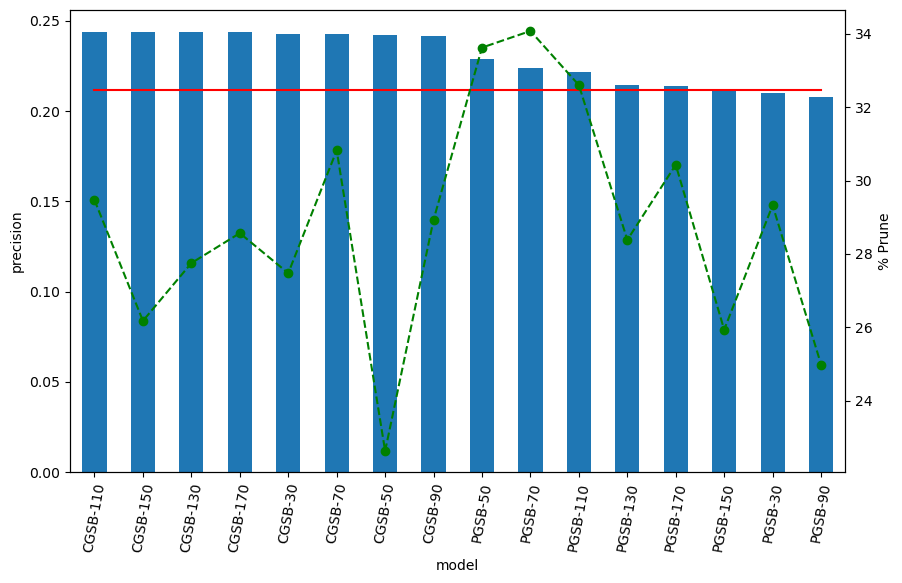

In [10]:
ax = df.plot.bar(x="model", y="avg_pre", rot=80, figsize=(10, 6))
ax.set_ylabel('precision')

ax.plot([old_best_model for _ in range(df.shape[0])], color='red', linestyle='-', label="Best Model")

ax2 = ax.twinx()
# plot prune percentage line
ax2.plot(df["%prune"].values, color='green', linestyle='--', marker='o')
ax2.set_ylabel('% Prune')

# Remove the legend
ax.legend().remove()

# Display the chart
plt.show()

In [10]:
from utils_visual import *
compare_models(clusters_experiment.iloc[:, 1::2])

### Performance based on the size of spectral clustering and similarity between nodes

In [3]:
data = pd.read_excel('exps.xlsx', sheet_name="complete-graph-clusters-avg")
data

,PGSB-30-1.1,CGSB-30-1.1,PGSB-30-1.2,CGSB-30-1.2,PGSB-30-1.3,CGSB-30-1.3,PGSB-30-1.4,CGSB-30-1.4,PGSB-50-1.1,CGSB-50-1.1,...,PGSB-170-1.1,CGSB-170-1.1,PGSB-170-1.2,CGSB-170-1.2,PGSB-170-1.3,CGSB-170-1.3,PGSB-170-1.4,CGSB-170-1.4,avg_pre,%prune
0,0.327,0.298,0.340,0.293,0.349,0.298,0.355,0.299,0.350,0.299,...,0.346,0.299,0.350,0.299,0.347,0.299,0.353,0.300,0.23398,90.656949
1,0.038,0.055,0.038,0.071,0.035,0.067,0.035,0.059,0.180,0.060,...,0.180,0.069,0.183,0.069,0.111,0.069,0.087,0.069,0.24277,90.689595
2,0.182,0.175,0.180,0.175,0.191,0.175,0.192,0.170,0.182,0.174,...,0.182,0.178,0.184,0.177,0.176,0.177,0.179,0.180,0.22881,94.078658
3,0.111,0.128,0.111,0.128,0.109,0.128,0.114,0.130,0.111,0.129,...,0.111,0.129,0.109,0.129,0.108,0.130,0.108,0.129,0.24306,91.547495
4,0.319,0.306,0.298,0.311,0.296,0.311,0.317,0.305,0.298,0.312,...,0.298,0.313,0.295,0.314,0.315,0.309,0.317,0.315,0.23513,96.377999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.043,0.273,0.292,0.273,0.263,0.274,0.133,0.275,0.295,0.274,...,0.292,0.275,0.292,0.275,0.043,0.275,0.044,0.275,NaN,NaN
96,0.306,0.367,0.326,0.367,0.319,0.367,0.336,0.357,0.306,0.367,...,0.304,0.358,0.265,0.359,0.315,0.346,0.306,0.361,NaN,NaN
97,0.165,0.121,0.165,0.125,0.158,0.124,0.190,0.125,0.150,0.124,...,0.150,0.126,0.150,0.127,0.149,0.126,0.091,0.124,NaN,NaN
98,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,...,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [4]:
cls_sim_experiment = data.iloc[:, :-2]
cls_sim_experiment

,PGSB-30-1.1,CGSB-30-1.1,PGSB-30-1.2,CGSB-30-1.2,PGSB-30-1.3,CGSB-30-1.3,PGSB-30-1.4,CGSB-30-1.4,PGSB-50-1.1,CGSB-50-1.1,...,PGSB-150-1.4,CGSB-150-1.4,PGSB-170-1.1,CGSB-170-1.1,PGSB-170-1.2,CGSB-170-1.2,PGSB-170-1.3,CGSB-170-1.3,PGSB-170-1.4,CGSB-170-1.4
0,0.327,0.298,0.340,0.293,0.349,0.298,0.355,0.299,0.350,0.299,...,0.345,0.299,0.346,0.299,0.350,0.299,0.347,0.299,0.353,0.300
1,0.038,0.055,0.038,0.071,0.035,0.067,0.035,0.059,0.180,0.060,...,0.088,0.069,0.180,0.069,0.183,0.069,0.111,0.069,0.087,0.069
2,0.182,0.175,0.180,0.175,0.191,0.175,0.192,0.170,0.182,0.174,...,0.181,0.177,0.182,0.178,0.184,0.177,0.176,0.177,0.179,0.180
3,0.111,0.128,0.111,0.128,0.109,0.128,0.114,0.130,0.111,0.129,...,0.107,0.129,0.111,0.129,0.109,0.129,0.108,0.130,0.108,0.129
4,0.319,0.306,0.298,0.311,0.296,0.311,0.317,0.305,0.298,0.312,...,0.289,0.314,0.298,0.313,0.295,0.314,0.315,0.309,0.317,0.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.043,0.273,0.292,0.273,0.263,0.274,0.133,0.275,0.295,0.274,...,0.045,0.275,0.292,0.275,0.292,0.275,0.043,0.275,0.044,0.275
96,0.306,0.367,0.326,0.367,0.319,0.367,0.336,0.357,0.306,0.367,...,0.295,0.335,0.304,0.358,0.265,0.359,0.315,0.346,0.306,0.361
97,0.165,0.121,0.165,0.125,0.158,0.124,0.190,0.125,0.150,0.124,...,0.182,0.127,0.150,0.126,0.150,0.127,0.149,0.126,0.091,0.124
98,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,...,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602


In [5]:
# split dataframes for each similarity condition letting only cluster size to vary
selected_columns = [
    [
        column
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for column in cls_sim_experiment.columns[i:i+2].values  # Get the subset of columns
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_per_sim_list = [cls_sim_experiment[columns] for columns in selected_columns]
cls_per_sim_list[0].head()

,PGSB-30-1.1,CGSB-30-1.1,PGSB-50-1.1,CGSB-50-1.1,PGSB-70-1.1,CGSB-70-1.1,PGSB-90-1.1,CGSB-90-1.1,PGSB-110-1.1,CGSB-110-1.1,PGSB-130-1.1,CGSB-130-1.1,PGSB-150-1.1,CGSB-150-1.1,PGSB-170-1.1,CGSB-170-1.1
0,0.327,0.298,0.350,0.299,0.339,0.298,0.345,0.299,0.347,0.299,0.340,0.298,0.353,0.299,0.346,0.299
1,0.038,0.055,0.180,0.060,0.180,0.061,0.180,0.069,0.180,0.069,0.180,0.062,0.109,0.069,0.180,0.069
2,0.182,0.175,0.182,0.174,0.183,0.174,0.180,0.177,0.184,0.177,0.182,0.176,0.182,0.177,0.182,0.178
3,0.111,0.128,0.111,0.129,0.111,0.127,0.111,0.128,0.109,0.129,0.111,0.128,0.111,0.128,0.111,0.129
4,0.319,0.306,0.298,0.312,0.298,0.306,0.298,0.310,0.296,0.314,0.298,0.309,0.298,0.310,0.298,0.313


In [6]:
models_avgs = data['avg_pre'].dropna().values

avgs_sim = [
    [
        avg
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for avg in models_avgs[i:i+2]  # Get the subset of avgs
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

In [7]:
models_prunes_per = data['%prune'].dropna().values

prune_per_sim = [
    [
        prune_per
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for prune_per in models_prunes_per[i:i+2]  # Get the subset of avgs
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

In [8]:
len(cls_per_sim_list[0].columns), len(avgs_sim[0]), len(prune_per_sim[0])

(16, 16, 16)

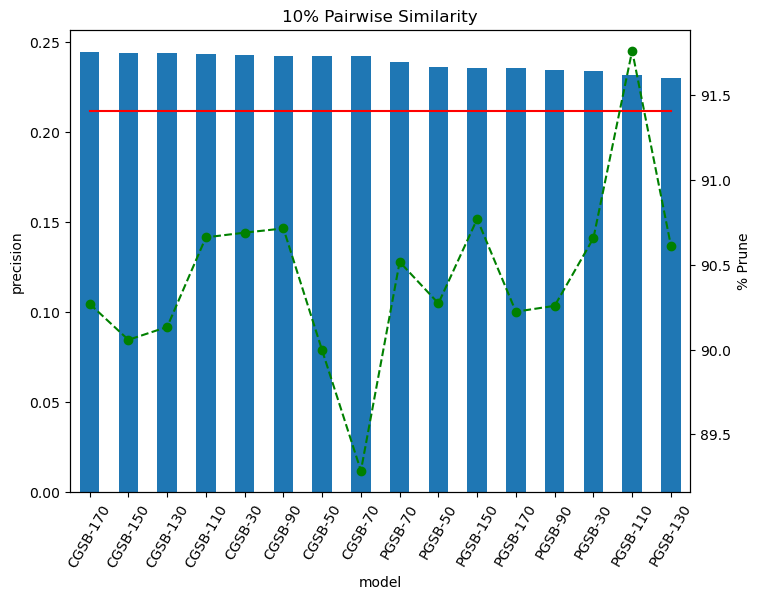

In [14]:
plot_experiment(cls_per_sim_list[0], avgs_sim[0], prune_per_sim[0], old_best_model, title="10% Pairwise Similarity")

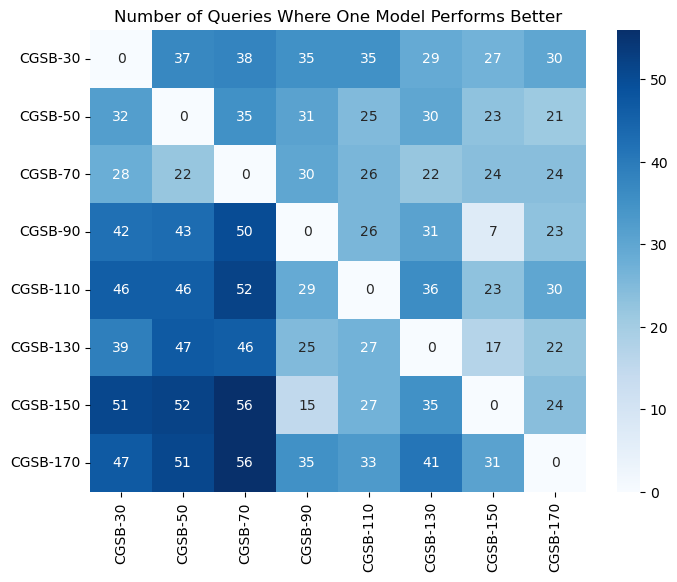

Best Model: CGSB-170


In [15]:
compare_models(cls_per_sim_list[0].iloc[:, 1::2])

In [16]:
# best = coef1*avg + coef2*sum + coef3*%prune
# 0,5*con_matrix_sum/800 + 0.35*avg + 0.15 *pruned_akmes/total akmes

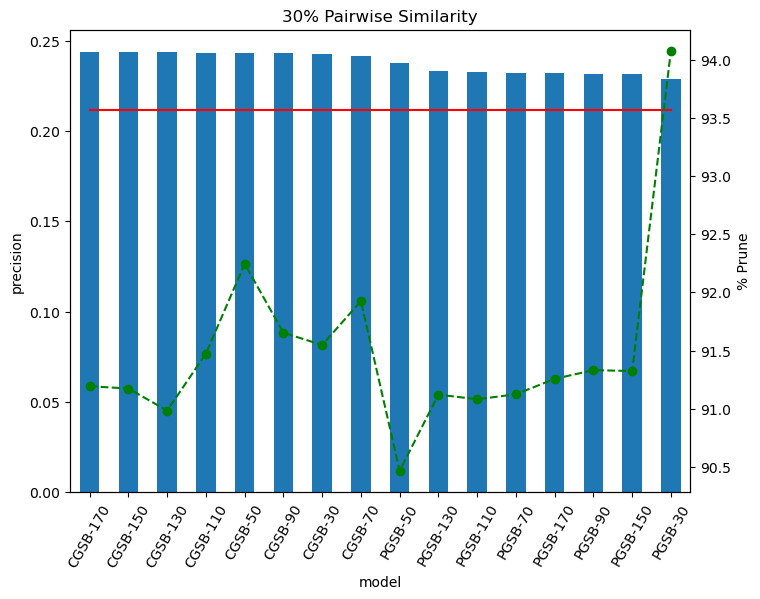

In [17]:
plot_experiment(cls_per_sim_list[1], avgs_sim[1], prune_per_sim[1], old_best_model, title="30% Pairwise Similarity")

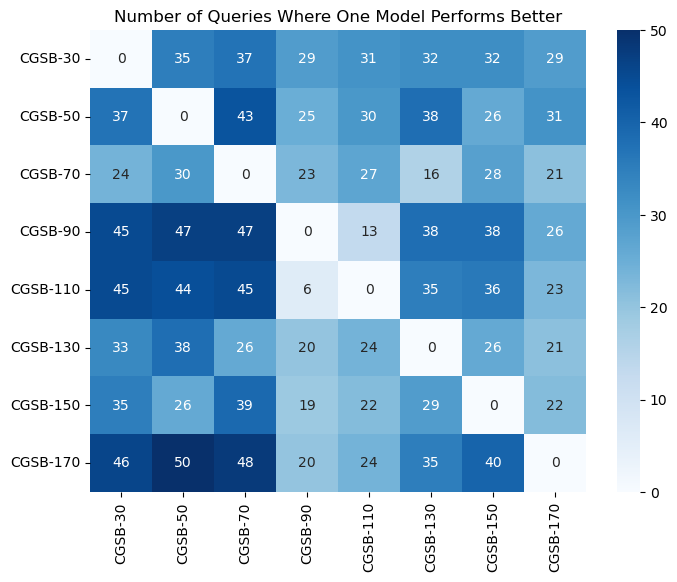

Best Model: CGSB-170


In [18]:
compare_models(cls_per_sim_list[1].iloc[:, 1::2])

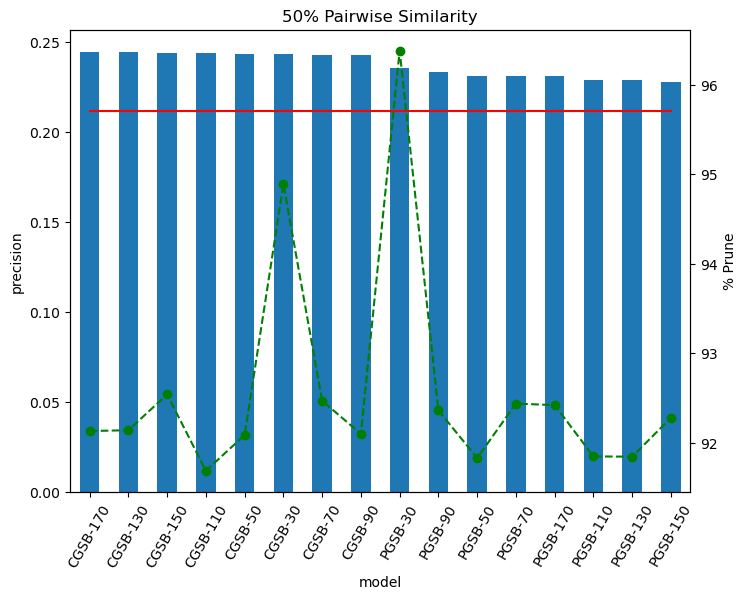

In [19]:
plot_experiment(cls_per_sim_list[2], avgs_sim[2], prune_per_sim[2], old_best_model, title="50% Pairwise Similarity")

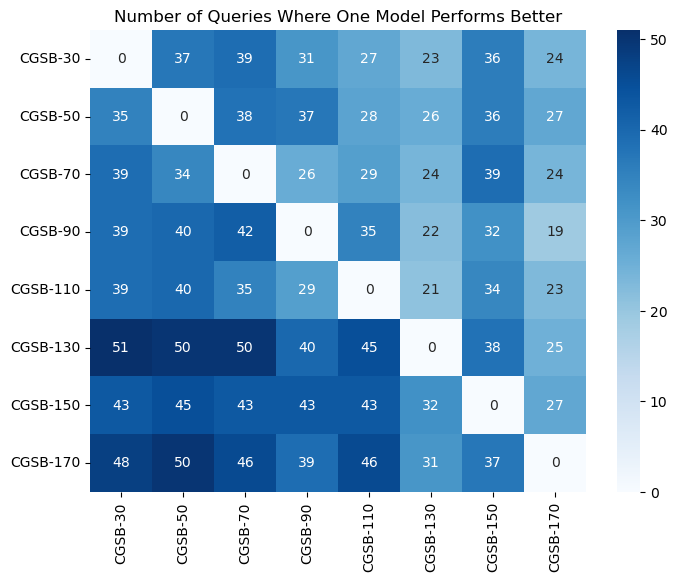

Best Model: CGSB-130


In [20]:
compare_models(cls_per_sim_list[2].iloc[:, 1::2])

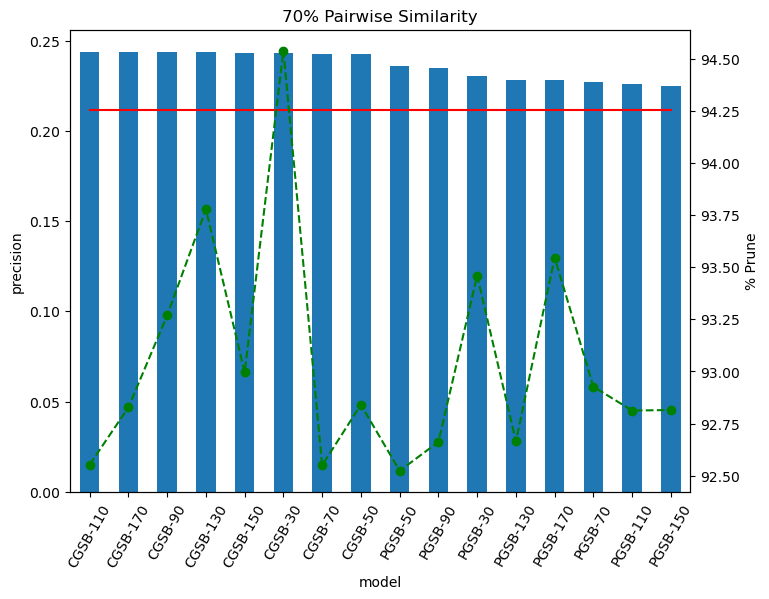

In [21]:
plot_experiment(cls_per_sim_list[3], avgs_sim[3], prune_per_sim[3], old_best_model, title="70% Pairwise Similarity")

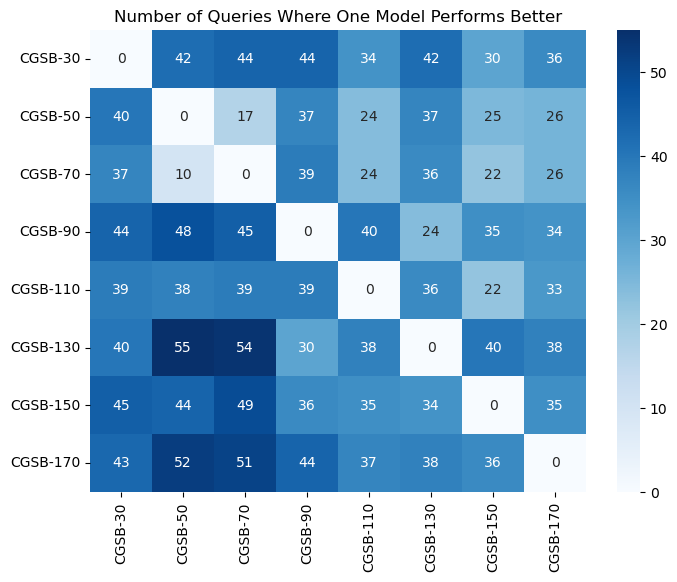

Best Model: CGSB-170


In [22]:
compare_models(cls_per_sim_list[3].iloc[:, 1::2])

### Performance based on the size of spectral clustering and edge (wout_avg * coeff) between nodes

In [26]:
# uparxei ksekathara grammiikh sxesh metaksu toy similarity kai % prune (sim->up, %prune->up)
#### sto constant window
# oso megalwnei to similarity, ara kai to pososto tou prune 
# toso kalutereuei to pgsw
# mexri ena shmeio, kathws to prune arxizei kai ginetai apokleistika apo to sim() >= (logw ths katanomhs twn clusters)
# kai h omoiothta auth dden einai antiproseupeutikh kathws ta embeddings den einai "kala"

# enw to cgsbw...anekfrastw
# afou ta embeddings/concepts axrhsta => cnwk => axrhsto na sunisferei

# gia na doume sth periptwsh tou varying clusters...
# isws ekei piasei kati